<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Scatter_Unknown_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PUF_120k_blank_filtered.csv')
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PUF_120k_blank_filtered.csv')
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PUF_120k_blank_filtered.csv')
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PUF_120k_blank_filtered.csv')
Auto_1_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PUF_120k_blank_filtered.csv')

Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PF_120k_blank_filtered.csv')
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PF_120k_blank_filtered.csv')
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PF_120k_blank_filtered.csv')
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PF_120k_blank_filtered.csv')
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PF_120k_blank_filtered.csv')

In [ ]:
def extract_elements(df):
    def extract_elements_from_formula(formula):
        elements = {'C': 0, 'O': 0, 'N': 0, 'S': 0, 'Si': 0, 'Cl': 0, 'F': 0, 'Br': 0, 'I': 0, 'B': 0, 'P': 0}

        current_element = ''
        current_count = ''

        for char in formula:
            if char.isalpha():
                if current_element:
                    # Update the count for the current element if it's in the predefined set
                    if current_element in elements:
                        elements[current_element] += int(current_count) if current_count else 1
                current_element = char
                current_count = ''
            elif char.isdigit():
                current_count += char

        # Handle the last element in the formula
        if current_element in elements:
            elements[current_element] += int(current_count) if current_count else 1

        return pd.Series(elements)

    # Apply the extract_elements_from_formula function to the 'Formula (mol ion)' column
    element_counts = df['Formula (mol ion)'].apply(extract_elements_from_formula)

    # Merge the extracted element counts with the original DataFrame
    df = pd.concat([df, element_counts], axis=1)
    return df

In [ ]:
Auto_5_gp_df = extract_elements(Auto_5_gp_df)
Auto_4_gp_df = extract_elements(Auto_4_gp_df)
Auto_3_gp_df = extract_elements(Auto_3_gp_df)
Auto_2_gp_df = extract_elements(Auto_2_gp_df)
Auto_1_gp_df = extract_elements(Auto_1_gp_df)

Auto_5_pm_df = extract_elements(Auto_5_pm_df)
Auto_4_pm_df = extract_elements(Auto_4_pm_df)
Auto_3_pm_df = extract_elements(Auto_3_pm_df)
Auto_2_pm_df = extract_elements(Auto_2_pm_df)
Auto_1_pm_df = extract_elements(Auto_1_pm_df)

In [ ]:
print(Auto_1_gp_df.head())

   Unnamed: 0                                     Component Name  \
0           0                          Benzene, (1-methylethyl)-   
1           1  Methyl 1-trimethylsilyl-2-methyl-cyclopropene-...   
2           2                            2-Ethyl-trans-2-butenal   
3           5           1,4,7-Trimethyl-3,6-dioxaoctane-1,8-diol   
4           8  3,3-Diisopropoxy-1,1,1,5,5,5-hexamethyltrisilo...   

   Retention Time  Reference m/z       Area    Height       TIC  \
0           5.026     105.069878  168120071  20250268  26897735   
1           5.057      80.062080   15224567   1530870   2378098   
2           5.078      78.994568   39631480   4357092  13383717   
3           5.193      59.049168    3834513    608288    921009   
4           5.318     207.032196   17055227   2061282   3637369   

  Formula (mol ion)     CAS No.     SI  ...  O  N  S  Si Cl  F  Br  I  B  P  
0             C9H12     98-82-8  941.0  ...  0  0  0   0  0  0   0  0  0  0  
1         C9H16O2Si  39492-10-9 

In [ ]:
df_names = ['Auto_5_gp_df', 'Auto_4_gp_df', 'Auto_3_gp_df', 'Auto_2_gp_df', 'Auto_1_gp_df', 'Auto_5_pm_df', 'Auto_4_pm_df', 'Auto_3_pm_df', 'Auto_2_pm_df', 'Auto_1_pm_df']
dfs = [globals()[name] for name in df_names]

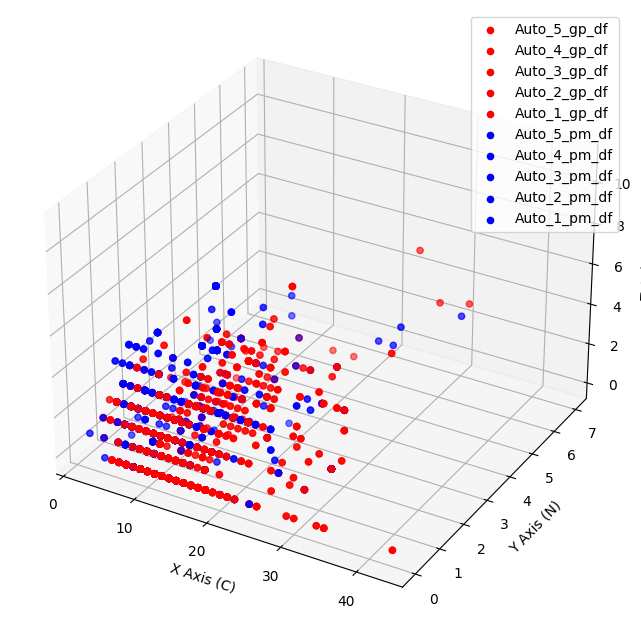

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for 'gp' and 'pm' dataframes
colors = ['red' if 'gp' in df_name else 'blue' for df_name in df_names]

# Iterate through the dataframes and plot the data
for df, color, df_name in zip(dfs, colors, df_names):
    # Extract relevant columns
    x_values = df['C']
    y_values = df['N']
    z_values = df['O']

    # Scatter plot
    ax.scatter(x_values, y_values, z_values, c=color, label=df_name)

# Set labels
ax.set_xlabel('X Axis (C)')
ax.set_ylabel('Y Axis (N)')
ax.set_zlabel('Z Axis (O)')

# Set legend
ax.legend()

# Allow the plot to be interactive
plt.show()

In [ ]:
combined_df = pd.concat([df.assign(Type=df_name) for df, df_name in zip(dfs, df_names)], ignore_index=True)

# Create a 3D scatter plot using Plotly Graph Objects
fig = go.Figure()

# Iterate through the dataframes and plot the data
for df_name in df_names:
    df_subset = combined_df[combined_df['Type'] == df_name]
    fig.add_trace(
        go.Scatter3d(
            x=df_subset['C'],
            y=df_subset['N'],
            z=df_subset['O'],
            mode='markers',
            marker=dict(size=4, opacity=0.7),
            name=df_name
        )
    )

# Set axis labels
fig.update_layout(scene=dict(
    xaxis=dict(title='X Axis (C)'),
    yaxis=dict(title='Y Axis (N)'),
    zaxis=dict(title='Z Axis (O)'),
))

# Set legend
fig.update_layout(legend=dict(title='Type'))

# Set layout title
fig.update_layout(title='3D Scatter Plot')

# Show the plot
fig.show()